In [1]:
import federated

In [2]:
data_path = './MNIST-data/raw'

# location of data and labels
test_labels_file = data_path + '/' + 't10k-labels-idx1-ubyte'
test_data_file = data_path + '/' + 't10k-images-idx3-ubyte'
train_labels_file = data_path + '/' + 'train-labels-idx1-ubyte'
train_data_file = data_path + '/' + 'train-images-idx3-ubyte'

In [3]:
import torch
import torchvision.datasets as dsets

import torchvision.transforms as transforms
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
#trans = transforms.Compose([transforms.ToTensor()])

# pytorch datasets that download MNIST set as needed; used only to download files
train_dset = dsets.MNIST(root=data_path, download=False, train=True, transform=trans)
test_dset = dsets.MNIST(root=data_path, download=False, train=False, transform=trans)

print("Training dset:", train_dset)
print("Test dset:", test_dset)

Training dset: Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./MNIST-data/raw
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(1.0,))
                         )
    Target Transforms (if any): None
Test dset: Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./MNIST-data/raw
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(1.0,))
                         )
    Target Transforms (if any): None


In [4]:
print("Training target 0:", train_dset.__getitem__(0))
train_item = train_dset.__getitem__(0)

Training target 0: (tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, 

In [5]:
print(train_item[1])

train_item[1].item()

train_dset.__getitem__(0)[1].item()

tensor(5)


5

In [6]:
train_targets = [[],[],[],[],[],[],[],[],[],[]]
test_targets = [[],[],[],[],[],[],[],[],[],[]]

for i in range(len(train_dset)):
    #print("i:", i, "target_value:", target_value)
    target_value = train_dset.__getitem__(i)[1].item()
    train_targets[target_value].append(i)

for i in range(len(test_dset)):
    #print("i:", i, "target_value:", target_value)
    target_value = test_dset.__getitem__(i)[1].item()
    test_targets[target_value].append(i)

"""
import random
sample_biases = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# takes a global training set, a global test set, and a ten-element list of biases as floats from 0.0 to 1.0
def stacked_decks(train_dset, test_dset, biases):

    for i in range(len(train_dset)):
        target_value = train_dset.__getitem__(i)[1].item()
        if(random.uniform(0.0, 1.0) <= biases[target_value]): train_targets[target_value].append(i)

    stacked_train = Subset(train_dset, train_targets)
        
    for i in range(len(test_dset)):
        target_value = test_dset.__getitem__(i)[1].item()
        if(random.uniform(0.0, 1.0) <= biases[target_value]): test_targets[target_value].append(i)
        
    stacked_test = Subset(test_dset, test_targets)

    return stacked_train, stacked_test


sttrain, sttest = stacked_decks(train_dset, test_dset, sample_biases)

print("sstrain length: ", sttrain.__getitem__(0)[1].item())
print("sstest length: ", type(sttest))
"""

'\nimport random\nsample_biases = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]\n\n# takes a global training set, a global test set, and a ten-element list of biases as floats from 0.0 to 1.0\ndef stacked_decks(train_dset, test_dset, biases):\n\n    for i in range(len(train_dset)):\n        target_value = train_dset.__getitem__(i)[1].item()\n        if(random.uniform(0.0, 1.0) <= biases[target_value]): train_targets[target_value].append(i)\n\n    stacked_train = Subset(train_dset, train_targets)\n        \n    for i in range(len(test_dset)):\n        target_value = test_dset.__getitem__(i)[1].item()\n        if(random.uniform(0.0, 1.0) <= biases[target_value]): test_targets[target_value].append(i)\n        \n    stacked_test = Subset(test_dset, test_targets)\n\n    return stacked_train, stacked_test\n\n\nsttrain, sttest = stacked_decks(train_dset, test_dset, sample_biases)\n\nprint("sstrain length: ", sttrain.__getitem__(0)[1].item())\nprint("sstest length: ", type(sttest))\n'

In [7]:
from torch.utils.data.dataset import Subset

train_subset_zeros = Subset(train_dset, train_targets[0])
train_subset_ones = Subset(train_dset, train_targets[1])
train_subset_twos = Subset(train_dset, train_targets[2])
train_subset_threes = Subset(train_dset, train_targets[3])
train_subset_fours = Subset(train_dset, train_targets[4])
train_subset_fives = Subset(train_dset, train_targets[5])
train_subset_sixes = Subset(train_dset, train_targets[6])
train_subset_sevens = Subset(train_dset, train_targets[7])
train_subset_eights = Subset(train_dset, train_targets[8])
train_subset_nines = Subset(train_dset, train_targets[9])

test_subset_zeros = Subset(test_dset, test_targets[0])
test_subset_ones = Subset(test_dset, test_targets[1])
test_subset_twos = Subset(test_dset, test_targets[2])
test_subset_threes = Subset(test_dset, test_targets[3])
test_subset_fours = Subset(test_dset, test_targets[4])
test_subset_fives = Subset(test_dset, test_targets[5])
test_subset_sixes = Subset(test_dset, test_targets[6])
test_subset_sevens = Subset(test_dset, test_targets[7])
test_subset_eights = Subset(test_dset, test_targets[8])
test_subset_nines = Subset(test_dset, test_targets[9])


#for i in range(len(test_subset_zeros)): print(test_subset_zeros.__getitem__(i)[1])

In [8]:
from torch.utils.data import DataLoader

# create dataloaders
batch_size = 32

train_dloader = DataLoader(train_dset, batch_size=batch_size, shuffle=True)
test_dloader = DataLoader(test_dset, batch_size=batch_size, shuffle=False)

#train_dloader = DataLoader(train_subset_sevens, batch_size=batch_size, shuffle=True)
#test_dloader = DataLoader(test_subset_sevens, batch_size=batch_size, shuffle=False)

print("train_dloader:", len(train_dloader), "test_dloader:", len(test_dloader))

train_dloader: 1875 test_dloader: 313


In [9]:
import torch.nn as nn

class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"

epoch:   0, batch index:  187, train loss: 1.87609
epoch:   0, batch index:  374, train loss: 0.91789
epoch:   0, batch index:  561, train loss: 0.61287
epoch:   0, batch index:  748, train loss: 0.42627
epoch:   0, batch index:  935, train loss: 0.40703
epoch:   0, batch index: 1122, train loss: 0.36024
epoch:   0, batch index: 1309, train loss: 0.33315
epoch:   0, batch index: 1496, train loss: 0.33216
epoch:   0, batch index: 1683, train loss: 0.39696
epoch:   0, batch index: 1870, train loss: 0.30523
epoch:   0, batch index: 1875, train loss: 0.32907
==>>> epoch: 0, batch index: 313, test loss: 0.39164, acc: 0.905


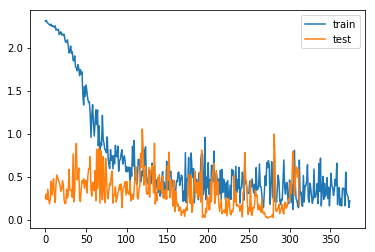

In [10]:
model = MLPNet()

learning_rate = 0.01
momentum = 0.5
num_epochs = 1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
criterion = nn.CrossEntropyLoss()

train_loss_history = []
test_loss_history = []

for epoch in range(num_epochs):

    # train
    avg_loss = 0
    for batch_idx, (x, target) in enumerate(train_dloader):
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        if(batch_idx % int(len(train_dloader)/len(test_dloader)) == 0): train_loss_history.append(loss.item())
        #train_loss_history.append(loss.item())
        avg_loss = avg_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
                    
        if (batch_idx+1) % int(len(train_dloader)/10) == 0 or (batch_idx+1) == len(train_dloader):
            print ('epoch: {:3d}, batch index: {:4d}, train loss: {:.5f}'.format(
                epoch, batch_idx+1, avg_loss))     
            
    # test
    correct_cnt, total_cnt, ave_loss = 0, 0, 0
    avg_loss = 0
    
    for batch_idx, (x, target) in enumerate(test_dloader):
        out = model(x)
        loss = criterion(out, target)
        test_loss_history.append(loss.item())
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum()
        
        #print(pred_label, target.data)
        #print(x.data.size()[0], (pred_label == target.data).sum().item())
        #print(correct_cnt, total_cnt)
        
        
        # smooth average
        avg_loss = avg_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 500 == 0 or (batch_idx+1) == len(test_dloader):
            print ('==>>> epoch: {}, batch index: {}, test loss: {:.5f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, avg_loss, correct_cnt.item() * 1.0 / total_cnt))

#TODO GET TEST LOSS AND ACCURACY CORRECT
#TODO SCALE TEST LOSS TO MATCH TRAIN LOSS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train_loss_history, label="train");
ax.plot(test_loss_history, label="test");
ax.legend();